# Machine Learning Pipeline: Hands-on Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

This [dataset](http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip) contains different parameters used to evaluate the quality of water at different sites in México. The samples are classified with the  *traffic light* (SEMAFORO in Spanish) code:  


| SEMAFORO | DESCRIPTION                                                                                                          |
|----------|----------------------------------------------------------------------------------------------------------------------|
| Verde    | Excelent quality.                                                                                                    |
| Amarillo | Water contaminated with Total Suspended Solids (SST in Spanish).                                                     |
| Rojo     | Water contaminated with Biochemical Oxigen Demanding (DBO in Spanish) or Chemical Oxigen Demanding (DQO in Spanish). |
| Morado   | Water sample is out of range in Total Dissolved Solids (SDT in Spanish).                                             |
| Azul     | Water sample is within the range of Total Dissolved Solids (SDT in Spanish).                                         |

This [link](https://es.wikipedia.org/wiki/Anexo:Definiciones_usuales_en_calidad_del_agua) explains (in Spanish) the parameters used to evaluate the quality of Water.

## Main objective

Predict the quality of Water for the giving features.

---

1. Download the [dataset](http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip)
2. Extract the files and load the `CSV` file `Resultados_de_calidad_del_agua_de_5000_sitios_de_monitoreo.csv` in Pandas and check that data is loaded correctly; if not, find where the problem is (*hint: check that all the columns contain the same type of data. Additional tools like LibreOffice may help you*).
3. Mark all the empty values with `ND` (No Data/No Disponible).

In [2]:
df = pd.read_csv("data/Resultados_de_calidad_del_agua_de_5000_sitios_de_monitoreo_nd.csv")

4. Replace the `ND` with `NaN`.

In [3]:
df.replace('ND', np.NaN, inplace=True)

5. Inspect the data (head, describe, dtypes, info, ...)

In [4]:
df.head()

,CLAVE,SITIO,CUENCA,CUERPO_DE_AGUA,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,TIPO,SUBTIPO,LONGITUD,...,CALIDAD_DBO,CALIDAD_DQO,CALIDAD_SST,CALIDAD_SDT,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_SDT,SEMAFORO,GRUPO
0,DLAGU48,PRESA MAL PASO COLA,RIO JUCHIPILA 1,PRESA MALPASO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,CALVILLO,LENTICO,PRESA,-102.64790,...,Excelente,Aceptable,Excelente,NaN,SI,SI,SI,NaN,Verde,LENTICO
1,DLBAJ66,"BAHIA DE LA PAZ SEG 25, 1 ISA9",COSTERO,BAHIA DE LA PAZ,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,COSTERO,BAHIA,-110.42209,...,NaN,NaN,Excelente,NaN,NaN,NaN,SI,NaN,Verde,COSTERO
2,DLBAJ67,HUMEDALES EL MOGOTE - ENSENADA DE LA PAZ 1,COSTERO,BAHIA DE LA PAZ,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,COSTERO,BAHIA,-110.35493,...,NaN,NaN,Buena calidad,NaN,NaN,NaN,SI,NaN,Verde,COSTERO
3,DLBAJ78,EL SARGENTO Y LA VENTANA,COSTERO,BAHIA LA VENTANA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,COSTERO,BAHIA,-109.99047,...,NaN,NaN,Excelente,NaN,NaN,NaN,SI,NaN,Verde,COSTERO
4,DLBAJ84,ENSENADA LOS MUERTOS,COSTERO,BAHIA DE MUERTOS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,COSTERO,BAHIA,-109.83324,...,NaN,NaN,Excelente,NaN,NaN,NaN,SI,NaN,Verde,COSTERO


In [5]:
df.describe()

,LONGITUD,LATITUD,ANIO
count,4883.000000,4883.000000,4883.0
mean,-101.057317,21.700819,2016.0
std,6.124160,4.088338,0.0
min,-117.124028,14.534910,2016.0
25%,-104.664715,18.845460,2016.0
50%,-100.536900,20.597040,2016.0
75%,-97.674805,24.478339,2016.0
max,-86.732147,32.706497,2016.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4883 entries, 0 to 4882
Data columns (total 26 columns):
CLAVE                  4883 non-null object
SITIO                  4883 non-null object
CUENCA                 3811 non-null object
CUERPO_DE_AGUA         4883 non-null object
ORGANISMO_DE_CUENCA    4883 non-null object
ESTADO                 4883 non-null object
MUNICIPIO              4883 non-null object
TIPO                   4883 non-null object
SUBTIPO                4883 non-null object
LONGITUD               4883 non-null float64
LATITUD                4883 non-null float64
ANIO                   4883 non-null int64
DBO_mg/L               2772 non-null object
DQO_mg/L               2779 non-null object
SST_mg/L               3810 non-null object
SDT_mg/L               1072 non-null object
CALIDAD_DBO            2772 non-null object
CALIDAD_DQO            2779 non-null object
CALIDAD_SST            3810 non-null object
CALIDAD_SDT            1072 non-null object
CUMPLE_CON_D

In [7]:
df.dtypes

CLAVE                   object
SITIO                   object
CUENCA                  object
CUERPO_DE_AGUA          object
ORGANISMO_DE_CUENCA     object
ESTADO                  object
MUNICIPIO               object
TIPO                    object
SUBTIPO                 object
LONGITUD               float64
LATITUD                float64
ANIO                     int64
DBO_mg/L                object
DQO_mg/L                object
SST_mg/L                object
SDT_mg/L                object
CALIDAD_DBO             object
CALIDAD_DQO             object
CALIDAD_SST             object
CALIDAD_SDT             object
CUMPLE_CON_DBO          object
CUMPLE_CON_DQO          object
CUMPLE_CON_SST          object
CUMPLE_CON_SDT          object
SEMAFORO                object
GRUPO                   object
dtype: object

6. Check that the types of the features are correct; if not, change them.

In [8]:
df = df.astype({'DBO_mg/L':'float64', 'DQO_mg/L':'float64', 'SST_mg/L':'float64', 'SDT_mg/L':'float64'})

In [9]:
df.describe()

,LONGITUD,LATITUD,ANIO,DBO_mg/L,DQO_mg/L,SST_mg/L,SDT_mg/L
count,4883.000000,4883.000000,4883.0,2772.000000,2779.000000,3810.000000,1072.000000
mean,-101.057317,21.700819,2016.0,17.468817,66.087142,52.531958,803.099655
std,6.124160,4.088338,0.0,69.284984,167.895993,158.896157,911.663470
min,-117.124028,14.534910,2016.0,0.500000,2.500000,2.500000,40.000000
25%,-104.664715,18.845460,2016.0,0.500000,10.557500,11.000000,336.000000
50%,-100.536900,20.597040,2016.0,2.290000,24.330000,25.042500,522.000000
75%,-97.674805,24.478339,2016.0,8.000000,50.482500,56.000000,873.997500
max,-86.732147,32.706497,2016.0,1862.220000,3199.580000,7120.000000,9874.000000


7. Notice that there are geospatial features (LONGITUD, LATITUD). Plot them.

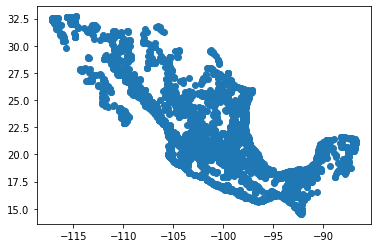

In [10]:
plt.scatter(x=df['LONGITUD'], y=df['LATITUD']);

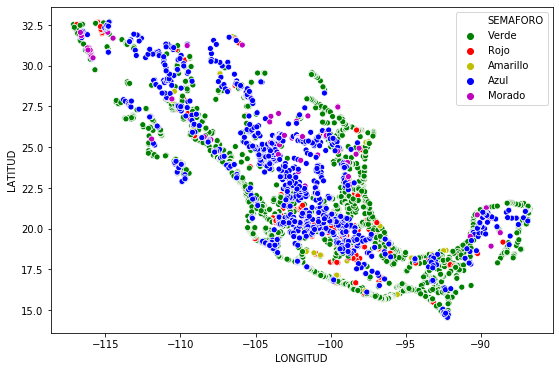

In [11]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(data = df, x=df['LONGITUD'], y=df['LATITUD'], hue = 'SEMAFORO', 
palette=dict(Verde = 'g', Rojo = 'r', Amarillo = 'y', Azul='b', Morado='m'),
ax=ax);

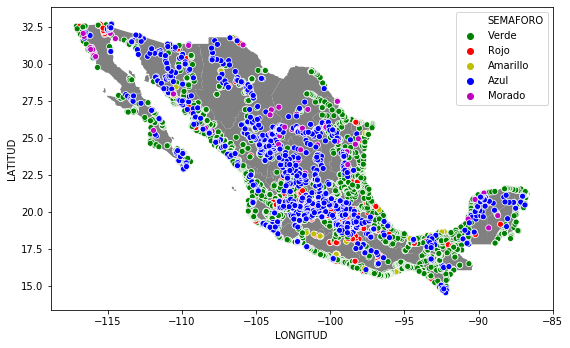

In [12]:
mex_map = gpd.read_file("data/maps/states/Mexico_States.shp")
fig, ax = plt.subplots(figsize=(9,6))
mex_map.plot(ax=ax, alpha=1, color='grey')
sns.scatterplot(data = df, x=df['LONGITUD'], y=df['LATITUD'], hue = 'SEMAFORO', 
palette=dict(Verde = 'g', Rojo = 'r', Amarillo = 'y', Azul='b', Morado='m'),
ax=ax);

8. Now, we can work with the numerical features. We can see how they are correlated (or not) with the label `SEMAFORO`. Group the samples by the final class and calculate the mean of DBO, DQO, SST and SDT for each label.

In [13]:
df[['SEMAFORO','DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'SDT_mg/L']].groupby(['SEMAFORO']).mean()

,DBO_mg/L,DQO_mg/L,SST_mg/L,SDT_mg/L
SEMAFORO,,,,
Amarillo,1.385676,24.543784,368.106882,NaN
Azul,NaN,NaN,NaN,604.828593
Morado,NaN,NaN,NaN,3365.173766
Rojo,50.934543,173.692573,97.878464,NaN
Verde,2.045465,15.887741,29.028797,NaN


*Note that, in fact, there are 2 datasets in 1 combined.*

9. Inspect the rest of the features. At this point, which features will you drop? Drop them, if any.

In [14]:
df.drop(columns=['ANIO', 'SDT_mg/L', 'CALIDAD_DBO', 'CALIDAD_DQO', 'CALIDAD_SST', 'CALIDAD_SDT', 
                 'CUMPLE_CON_DBO', 'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_SDT','CLAVE', 
                 'SITIO', 'CUENCA', 'CUERPO_DE_AGUA', 'ORGANISMO_DE_CUENCA', 'MUNICIPIO', 'TIPO', 
                 'SUBTIPO'], inplace=True)

10. Find how many instances we have of each class.

In [15]:
df['SEMAFORO'].value_counts()

Verde       2844
Azul         995
Rojo         882
Amarillo      85
Morado        77
Name: SEMAFORO, dtype: int64

11. Keep only the classes `Rojo`, `Amarillo` and `Verde`.

In [16]:
df=df[(df['SEMAFORO'] != 'Azul') & (df['SEMAFORO'] != 'Morado')]

12. Make a `pairplot` with the numerical features. And explain the result.

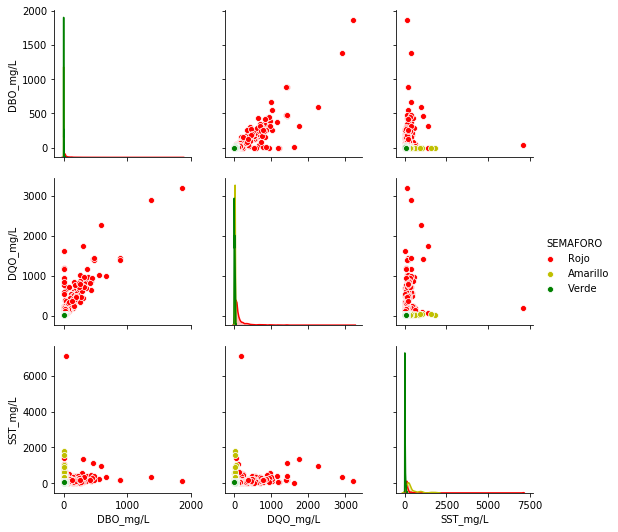

In [17]:
tmpdf = df.dropna()
sns.pairplot(tmpdf[['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'SEMAFORO']], hue='SEMAFORO', 
palette=dict(Verde = 'g', Amarillo = 'y', Rojo = 'r'), hue_order=['Rojo', 'Amarillo', 'Verde'], dropna=True);

13. Plot `LONGITUD`, `LATITUD` with the colors corresponding to the classes (`Rojo`='r', `Àmarillo`='y' `Verde`='g')

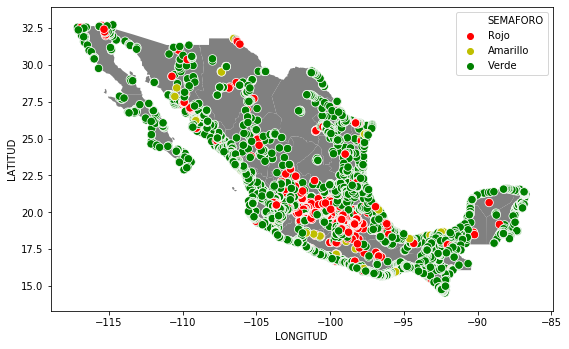

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
mex_map.plot(ax=ax, alpha=1, color='grey')
sns.scatterplot(data = df, x=df['LONGITUD'], y=df['LATITUD'], hue = 'SEMAFORO', 
palette=dict(Verde = 'g', Rojo = 'r', Amarillo = 'y'), hue_order=['Rojo', 'Amarillo', 'Verde'], ax=ax, s=70);

14. Find how many missing values are in each feature.

In [19]:
df.isna().sum()/len(df)*100

ESTADO       0.000000
LONGITUD     0.000000
LATITUD      0.000000
DBO_mg/L    27.263186
DQO_mg/L    27.079507
SST_mg/L     0.026240
SEMAFORO     0.000000
GRUPO        0.000000
dtype: float64

15. Replace the missing values.

In [20]:
df['DBO_mg/L'] = df.groupby('ESTADO').transform(lambda x: x.fillna(x.mean()))['DBO_mg/L']
df['DQO_mg/L'] = df.groupby('ESTADO').transform(lambda x: x.fillna(x.mean()))['DQO_mg/L']
df['SST_mg/L'] = df.groupby('ESTADO').transform(lambda x: x.fillna(x.mean()))['SST_mg/L']

In [21]:
df.head()

,ESTADO,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,SEMAFORO,GRUPO
0,AGUASCALIENTES,-102.64790,21.85779,0.500000,27.900000,6.75,Verde,LENTICO
1,BAJA CALIFORNIA SUR,-110.42209,24.11737,2.244545,38.791364,10.00,Verde,COSTERO
2,BAJA CALIFORNIA SUR,-110.35493,24.11762,2.244545,38.791364,72.50,Verde,COSTERO
3,BAJA CALIFORNIA SUR,-109.99047,24.07696,2.244545,38.791364,7.50,Verde,COSTERO
4,BAJA CALIFORNIA SUR,-109.83324,23.98474,2.244545,38.791364,13.75,Verde,COSTERO


In [22]:
df.columns

Index(['ESTADO', 'LONGITUD', 'LATITUD', 'DBO_mg/L', 'DQO_mg/L', 'SST_mg/L',
       'SEMAFORO', 'GRUPO'],
      dtype='object')

16. Build the correlation matrix for numerical features.

In [23]:
# standard correlation coefficient, Pearson's
data_corr = df[['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L']]
corr_matrix = data_corr.corr()

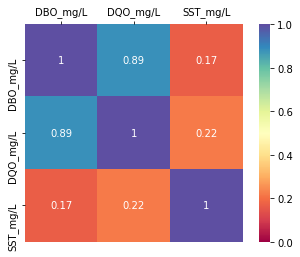

In [24]:
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cbar=True, square=True, 
vmax=1, vmin=0, ax=ax, cmap='Spectral')
ax.xaxis.set_ticks_position('top')

17. Transform the categorical features in categorical data types.

In [25]:
from pandas.api.types import CategoricalDtype

semaforo_cat = CategoricalDtype(categories=['Verde', 'Rojo', 'Amarillo'], ordered=True)
df['SEMAFORO_cat'] = df['SEMAFORO'].astype(semaforo_cat).cat.codes

In [26]:
df['ESTADO_cat'] = df['ESTADO'].astype('category').cat.codes

In [27]:
df['GRUPO_cat'] = df['GRUPO'].astype('category').cat.codes

In [28]:
df.sample(5, random_state=0)

,ESTADO,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,SEMAFORO,GRUPO,SEMAFORO_cat,ESTADO_cat,GRUPO_cat
1830,MORELOS,-98.92513,18.84139,14.625,65.495,44.00,Rojo,LOTICO,1,16,2
725,GUERRERO,-100.46367,17.14158,0.500,30.620,19.50,Verde,LOTICO,0,11,2
3267,SINALOA,-107.62794,25.02704,0.500,9.985,10.75,Verde,LENTICO,0,24,1
599,GUANAJUATO,-100.67780,20.04022,11.000,46.000,9.00,Rojo,LOTICO,1,10,2
1288,PUEBLA,-98.46104,19.32276,5.505,28.490,17.50,Verde,LOTICO,0,20,2


18. Check if the classes to predict are balanced. 

In [29]:
df['SEMAFORO'].value_counts()/len(df)*100

Verde       74.626082
Rojo        23.143532
Amarillo     2.230386
Name: SEMAFORO, dtype: float64

*Notice that the classes are imbalanced. We have to consider this when building the model.*

19. Choose and build a model to predict the `SEMAFORO` class.

In [30]:
# features
X = df[['LONGITUD', 'LATITUD', 'DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'ESTADO_cat', 'GRUPO_cat']].values

In [31]:
# label
y = df[['SEMAFORO_cat']].values

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
y_train.shape

(2858, 1)

In [35]:
y_train=y_train.reshape(2858,)

*We chose Random Forest Classifier because it does not require to normalize the features, does not assume any specific distribution of the features and does not require to eliminate the correlated features (check the correlation matrix)*

In [36]:
# If 'balanced', class weights will be given by n_samples / (n_classes * np.bincount(y))
# The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the 
# bootstrap sample for every tree grown.

rt_clf = RandomForestClassifier(random_state=0)

cw = {0: 0.24, 1: 0.76, 2: 0.98} 

param_grid = [{'n_estimators': [10, 50, 100], 
               'class_weight': [cw, 'balanced', 'balanced_subsample' ]}] #'class_weight'
cv = 5

model = GridSearchCV(rt_clf, param_grid, cv=cv)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'

In [37]:
model.best_params_

{'class_weight': {0: 0.24, 1: 0.76, 2: 0.98}, 'n_estimators': 50}

*`GridSearchCV` exhaustively considers all parameter combinations in the hyper-parameter space for the best cross validation score.*

In [38]:
names_feat = ['LONGITUD', 'LATITUD', 'DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'ESTADO_cat', 'GRUPO_cat']

In [39]:
optimized_model = model.best_estimator_
i = 0
for feat in names_feat:
    print("{} \t : {:.3f}".format(feat, optimized_model.feature_importances_[i]))
    i += 1

LONGITUD 	 : 0.033
LATITUD 	 : 0.030
DBO_mg/L 	 : 0.119
DQO_mg/L 	 : 0.521
SST_mg/L 	 : 0.156
ESTADO_cat 	 : 0.011
GRUPO_cat 	 : 0.131


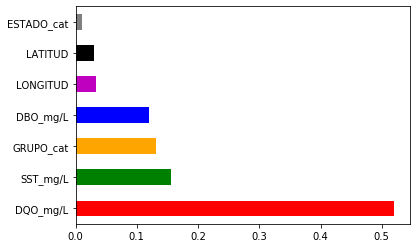

In [40]:
feat_importances = pd.Series(optimized_model.feature_importances_, index=names_feat)
feat_importances.nlargest(7).plot(kind='barh', color=['r', 'g', 'orange', 'b', 'm', 'black', 'grey']);

*Feature importances : the higher, the more important the feature.
The values of this array sum to 1, unless all trees are single node trees consisting of only the root node, in which case it will be an array of zeros.*

In [41]:
y_pred = optimized_model.predict(X_test)
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       709
           1       0.99      1.00      0.99       220
           2       1.00      0.96      0.98        24

    accuracy                           1.00       953
   macro avg       1.00      0.98      0.99       953
weighted avg       1.00      1.00      1.00       953



## Conclusion

- All the metrics prove that we have got a robust model.
- Notice that the data it's simple and well associated with the color code.
- This data it was collected in the year 2016, it would be interesting to test our model with new data.


## Measure of association between categorical features

In [42]:
# https://pypi.org/project/researchpy/
import researchpy

researchpy.crosstab(df['SEMAFORO'], df['GRUPO'])

GRUPO                     
         COSTERO LENTICO LOTICO   All
SEMAFORO                             
Amarillo      47       8     30    85
Rojo          13     224    645   882
Verde       1041     589   1214  2844
All         1101     821   1889  3811

In [43]:
# Demonstration of calculating cell proportions

crosstab_cell = researchpy.crosstab(df['SEMAFORO'], df['GRUPO'], prop= "cell")

crosstab_cell

GRUPO                       
         COSTERO LENTICO LOTICO     All
SEMAFORO                               
Amarillo    1.23    0.21   0.79    2.23
Rojo        0.34    5.88  16.92   23.14
Verde      27.32   15.46  31.86   74.63
All        28.89   21.54  49.57  100.00

In [44]:
# Demonstration of calculating row proportions

crosstab_row = researchpy.crosstab(df['SEMAFORO'], df['GRUPO'], prop= "row")

crosstab_row

GRUPO                      
         COSTERO LENTICO LOTICO    All
SEMAFORO                              
Amarillo   55.29    9.41  35.29  100.0
Rojo        1.47   25.40  73.13  100.0
Verde      36.60   20.71  42.69  100.0
All        28.89   21.54  49.57  100.0

In [45]:
# Demonstration of calculating column proportions

crosstab_col = researchpy.crosstab(df['SEMAFORO'], df['GRUPO'], prop= "col")

crosstab_col

GRUPO                        
         COSTERO LENTICO  LOTICO     All
SEMAFORO                                
Amarillo    4.27    0.97    1.59    2.23
Rojo        1.18   27.28   34.15   23.14
Verde      94.55   71.74   64.27   74.63
All       100.00  100.00  100.00  100.00

In [46]:
researchpy.crosstab(df['SEMAFORO'], df['GRUPO'], test= "chi-square")

(           GRUPO                     
          COSTERO LENTICO LOTICO   All
 SEMAFORO                             
 Amarillo      47       8     30    85
 Rojo          13     224    645   882
 Verde       1041     589   1214  2844
 All         1101     821   1889  3811,
                 Chi-square test   results
 0  Pearson Chi-square ( 4.0) =   450.8035
 1                    p-value =     0.0000
 2                 Cramer's V =     0.2432)

In [47]:
# To clean up the output, assign each DataFrame to an object. This allows
# for a cleaner view and each DataFrame to be exported

crosstab, res = researchpy.crosstab(df['SEMAFORO'], df['GRUPO'], test= "chi-square")

crosstab

GRUPO                     
         COSTERO LENTICO LOTICO   All
SEMAFORO                             
Amarillo      47       8     30    85
Rojo          13     224    645   882
Verde       1041     589   1214  2844
All         1101     821   1889  3811

In [48]:
res

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,450.8035
1,p-value =,0.0000
2,Cramer's V =,0.2432


In [49]:
# To get the expected frequencies, pass "True" in "expected_freqs="

crosstab, res, expected = researchpy.crosstab(df['SEMAFORO'], df['GRUPO'], test= "chi-square", expected_freqs= True)

expected

GRUPO                         
             COSTERO     LENTICO       LOTICO
SEMAFORO                                     
Amarillo   24.556547   18.311467    42.131986
Rojo      254.810286  190.008397   437.181317
Verde     821.633167  612.680136  1409.686696

In [50]:
res

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,450.8035
1,p-value =,0.0000
2,Cramer's V =,0.2432


## Multi-class confusion matrix library in Python

In [51]:
# https://github.com/sepandhaghighi/pycm
from pycm import *

In [52]:
cm = ConfusionMatrix(actual_vector=y_test.reshape(y_test.shape[0],), predict_vector=y_pred) # Create CM From Data
cm.relabel(mapping={0:"Verde", 1:"Rojo", 2:"Amarillo"})
cm.classes

['Verde', 'Rojo', 'Amarillo']

In [53]:
cm.table

{'Verde': {'Verde': 707, 'Rojo': 2, 'Amarillo': 0},
 'Rojo': {'Verde': 1, 'Rojo': 219, 'Amarillo': 0},
 'Amarillo': {'Verde': 1, 'Rojo': 0, 'Amarillo': 23}}

In [54]:
print(cm)

Predict        Verde          Rojo           Amarillo       
Actual
Amarillo       23             0              1              

Rojo           0              219            1              

Verde          0              2              707            





Overall Statistics : 

95% CI                                                            (0.9917,0.99991)
ACC Macro                                                         0.9972
AUNP                                                              0.99454
AUNU                                                              0.99001
Bennett S                                                         0.9937
CBA                                                               0.98215
Chi-Squared                                                       1848.09206
Chi-Squared DF                                                    4
Conditional Entropy                                               0.03677
Cramer V                                         

In [ ]:
online_help('OOC')

---